In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Extracting the data from the file.
open_file = 'mnist_traindata.hdf5'
with h5py.File(open_file, 'r') as columns:
    file_datacols = np.array(columns)
    print(file_datacols)

['xdata' 'ydata']


In [3]:
# Load data
with h5py.File('mnist_traindata.hdf5', 'r') as f:
    X_train = np.array(f['xdata'])
    y_train = np.array(f['ydata'])

with h5py.File('mnist_testdata.hdf5', 'r') as f:
    X_test = np.array(f['xdata'])
    y_test = np.array(f['ydata'])

In [4]:
# Convert to binary classification (Digit"2" = 1, otherwise 0)
y_train_binary = (y_train[:, 2] == 1).astype(int)
y_test_binary = (y_test[:, 2] == 1).astype(int)

In [5]:
# Initialize weights and bias
weights = np.zeros(X_train.shape[1])
bias = 0.0
learning_rate = 0.001
epochs = 100
batch_size = 128

In [6]:
# Initialize lists to store loss and accuracy over time
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

In [7]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Binary cross-entropy loss
def binary_cross_entropy_loss(y_true, y_pred, weights, reg_lambda):
    epsilon = 1e-7  # Small value to prevent log(0)
    cross_entropy_loss = -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))
    l2_regularization = (reg_lambda / 2) * np.sum(weights ** 2)
    return cross_entropy_loss + l2_regularization

Epoch 0: Training Loss = 0.32031985649416733, Test Loss = 0.32467699260616023
Epoch 10: Training Loss = 0.17804979254730968, Test Loss = 0.17789516905931274
Epoch 20: Training Loss = 0.15140215595241574, Test Loss = 0.15072263053254856
Epoch 30: Training Loss = 0.14063581232971806, Test Loss = 0.13984038370600765
Epoch 40: Training Loss = 0.13494274650093485, Test Loss = 0.1341823652920229
Epoch 50: Training Loss = 0.1314904098091155, Test Loss = 0.13079975092137558
Epoch 60: Training Loss = 0.12920351844424569, Test Loss = 0.1285822242081769
Epoch 70: Training Loss = 0.12759001108554857, Test Loss = 0.12704797858814965
Epoch 80: Training Loss = 0.12639257424597833, Test Loss = 0.12590929453906086
Epoch 90: Training Loss = 0.12546790530709673, Test Loss = 0.12505919462718504
Final Train Loss: 0.12479625522360899, Final Test Loss: 0.12443510397276913
Final Train Accuracy: 0.9694833333333334, Final Test Accuracy: 0.9704


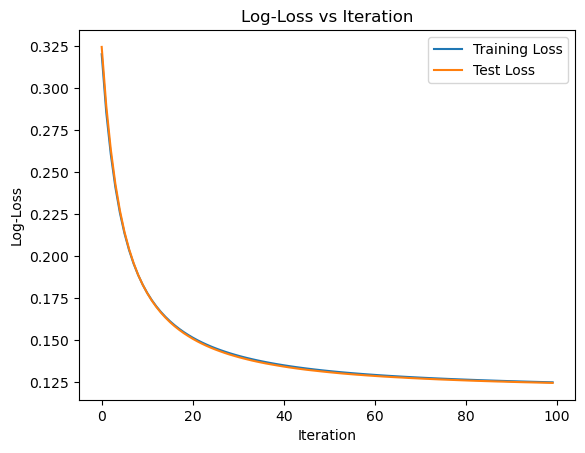

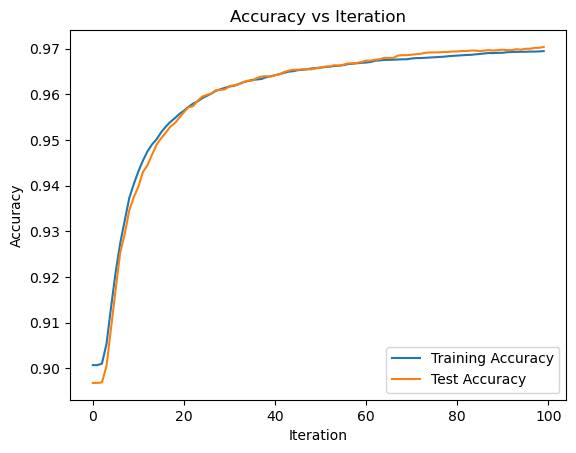

In [8]:
# Training loop

reg_lambda = 0.01  # Regularization strength (you can adjust this value)

for epoch in range(epochs):
    indices = np.random.permutation(X_train.shape[0]) #Shuffling the data
    X_train_shuffled = X_train[indices]
    y_train_binary_shuffled = y_train_binary[indices]
    
    # Mini-Batch Gradient Descent
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i + batch_size]
        y_batch = y_train_binary_shuffled[i:i + batch_size]
        
        z_batch = np.dot(X_batch, weights) + bias #dot product between the mini-batch of input data and the weights plus bias 
        y_pred_batch = sigmoid(z_batch) #converting it into a probability (0~1)
        
        # Gradient calculation with L2 regularization
        dw = np.dot(X_batch.T, (y_pred_batch - y_batch)) / X_batch.shape[0] + reg_lambda * weights
        db = np.mean(y_pred_batch - y_batch)

        #Updates weights and bias 
        weights -= learning_rate * dw
        bias -= learning_rate * db

    # Compute predictions on the full training set
    z_train = np.dot(X_train, weights) + bias
    y_pred_train = sigmoid(z_train)
        
    # Compute loss and accuracy on training set
    loss_train = binary_cross_entropy_loss(y_train_binary, y_pred_train, weights, reg_lambda)
    predictions_train = (y_pred_train >= 0.5).astype(int) # Step V : using a 0.5 threshold
    accuracy_train = np.mean(predictions_train == y_train_binary)
        
    # Store the loss and accuracy
    train_loss.append(loss_train)
    train_accuracy.append(accuracy_train)
        
    # Compute predictions on the full test set
    z_test = np.dot(X_test, weights) + bias
    y_pred_test = sigmoid(z_test)
        
    # Compute loss and accuracy on test set
    loss_test = binary_cross_entropy_loss(y_test_binary, y_pred_test, weights, reg_lambda)
    predictions_test = (y_pred_test >= 0.5).astype(int) # Step V : using a 0.5 threshold
    accuracy_test = np.mean(predictions_test == y_test_binary)
        
    # Store the test loss and accuracy
    test_loss.append(loss_test)
    test_accuracy.append(accuracy_test)
    # Print progress every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Training Loss = {loss_train}, Test Loss = {loss_test}")

# Compute final accuracy and loss
print(f"Final Train Loss: {train_loss[-1]}, Final Test Loss: {test_loss[-1]}")
print(f"Final Train Accuracy: {train_accuracy[-1]}, Final Test Accuracy: {test_accuracy[-1]}")

# Step iv Plot log-loss of the training set and test set on the same figure.
plt.plot(train_loss, label="Training Loss")
plt.plot(test_loss, label="Test Loss")
plt.xlabel("Iteration")
plt.ylabel("Log-Loss")
plt.title("Log-Loss vs Iteration")
plt.legend()
plt.show()

plt.plot(train_accuracy, label="Training Accuracy")
plt.plot(test_accuracy, label="Test Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Iteration")
plt.legend()
plt.show()

In [9]:
# Save the model parameters
with h5py.File('mnist_network_params.hdf5', 'w') as hf:
    hf.create_dataset('w', data=np.asarray(weights))
    hf.create_dataset('b', data=np.asarray(bias))
print("Shape of weights (w):", weights.shape)
print("Shape of bias (b):", bias.shape)


Shape of weights (w): (784,)
Shape of bias (b): ()
